In [28]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#Load the dataset
synthetic_dataset = pd.read_csv("A1-synthetic.txt", sep='\t', header=0)
x = synthetic_dataset[['#v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']]
y = synthetic_dataset[['z']]
#Scale the data
#Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, shuffle=True)


Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.0482 - mae: 0.1740 - val_loss: 0.0170 - val_mae: 0.1033
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0121 - mae: 0.0857 - val_loss: 0.0073 - val_mae: 0.0661
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0075 - mae: 0.0693 - val_loss: 0.0052 - val_mae: 0.0561
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0052 - mae: 0.0574 - val_loss: 0.0040 - val_mae: 0.0494
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0524 - val_loss: 0.0033 - val_mae: 0.0442
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0037 - mae: 0.0495 - val_loss: 0.0026 - val_mae: 0.0408
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0034 - mae: 0.0464 - val_loss: 0.0036 - val_mae: 0.0497
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0028 - 

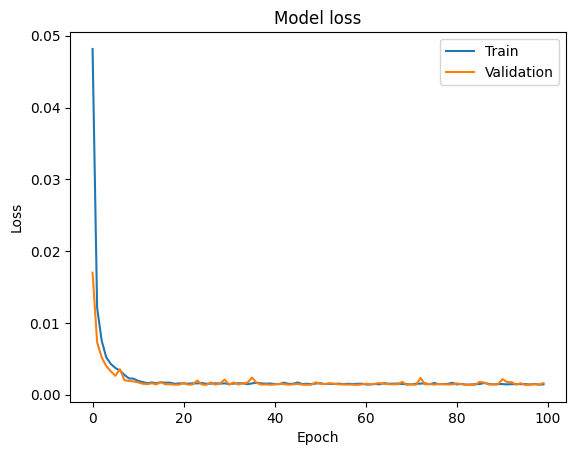

In [46]:
# Part 2: Implementation of NN
from tensorflow import keras as keras
from matplotlib import pyplot as plt


model = keras.models.Sequential([
    keras.layers.Dense(4, input_shape=(x_train.shape[1],) ,activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.SGD(learning_rate=0.15, momentum=0.6)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


25/25 [==============================] - 0s 2ms/step
---Test---
R2 Score:  0.9672631543701304
MSE:  0.0016237320534356842
MAE:  0.03315683624662508
---Train---
R2 Score:  0.9695722554273525
MSE:  0.001591512262987944
MAE:  0.03219478831067648

MAPE:  0.11390341268602022


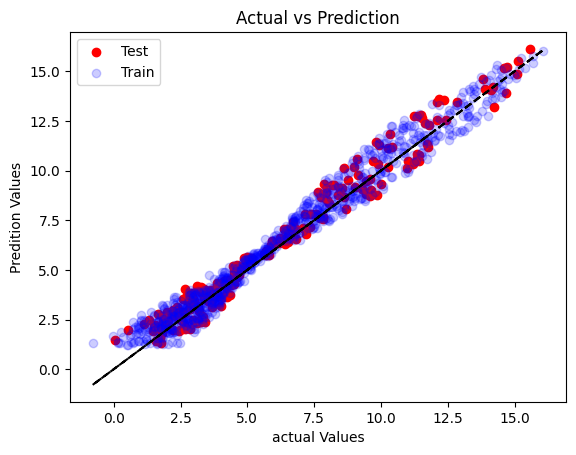

In [47]:
from sklearn.metrics import *
from matplotlib import pyplot as plt


# Part 3: Obtaining predictions
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", alpha=0.2, label="Train")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()
